# Estadística Descriptiva

Es fácil calcular estadísticos de resumen en `python`. Aquí tienen cómo calcular la media, desviación estándar, varianza y mediana.

## Medidas de resumen

Creamos 100 números aleatorios con distribución normal:

In [1]:
import numpy as np
N = 100
x = np.random.normal(loc = 0, scale = 1, size = N)

### Desviación estándar

In [2]:
np.std(x)

0.9890816616081751

### Varianza

In [3]:
np.var(x)

0.9782825333295887

`hstack` agrega valores al vector:

In [4]:
x1 = np.hstack((x,np.nan))

### Promedio

Toma en cuenta lo que pasa con valores `nan`

In [5]:
np.mean(x1)

nan

In [6]:
np.nanmean(x1)

0.016369089616761458

In [7]:
np.nanstd(x1)

0.9890816616081751

In [8]:
np.nanvar(x1)

0.9782825333295887

In [9]:
np.median(x)

0.14215762278539953

### La moda

In [10]:
from scipy import stats

In [11]:
data = [1,3,4,4,7,4]

In [12]:
stats.mode(data)

ModeResult(mode=array([4]), count=array([3]))

### Rango

In [13]:
range = np.ptp(x) # ptp: peak to peak

In [14]:
range

4.406481917499111

### Percentiles

In [15]:
from scipy import stats

#https://docs.scipy.org/doc/scipy/reference/stats.html
stats.mstats.mquantiles(x)

array([-0.78495944,  0.14215762,  0.69113504])

In [16]:
stats.mstats.mquantiles(x,prob=np.arange(0,1.1,0.1))

array([-2.05291309, -1.21599396, -0.97713944, -0.68446382, -0.23298969,
        0.14215762,  0.30459832,  0.58255781,  0.98843656,  1.25628931,
        2.35356883])

In [17]:
stats.describe(x)

DescribeResult(nobs=100, minmax=(-2.0529130892498864, 2.3535688282492244), mean=0.016369089616761458, variance=0.9881641750803926, skewness=0.025553772937589085, kurtosis=-0.6669762529585692)

## Distribuciones

In [18]:
miFD = stats.norm(5,3)

In [19]:
miFD

In [20]:
x = np.linspace(-5,15,101)
y1 = miFD.pdf(x) # densidad
y2 = miFD.cdf(x) # acumulada
y3 = miFD.ppf(y2) # cuantil

<IPython.core.display.Javascript object>


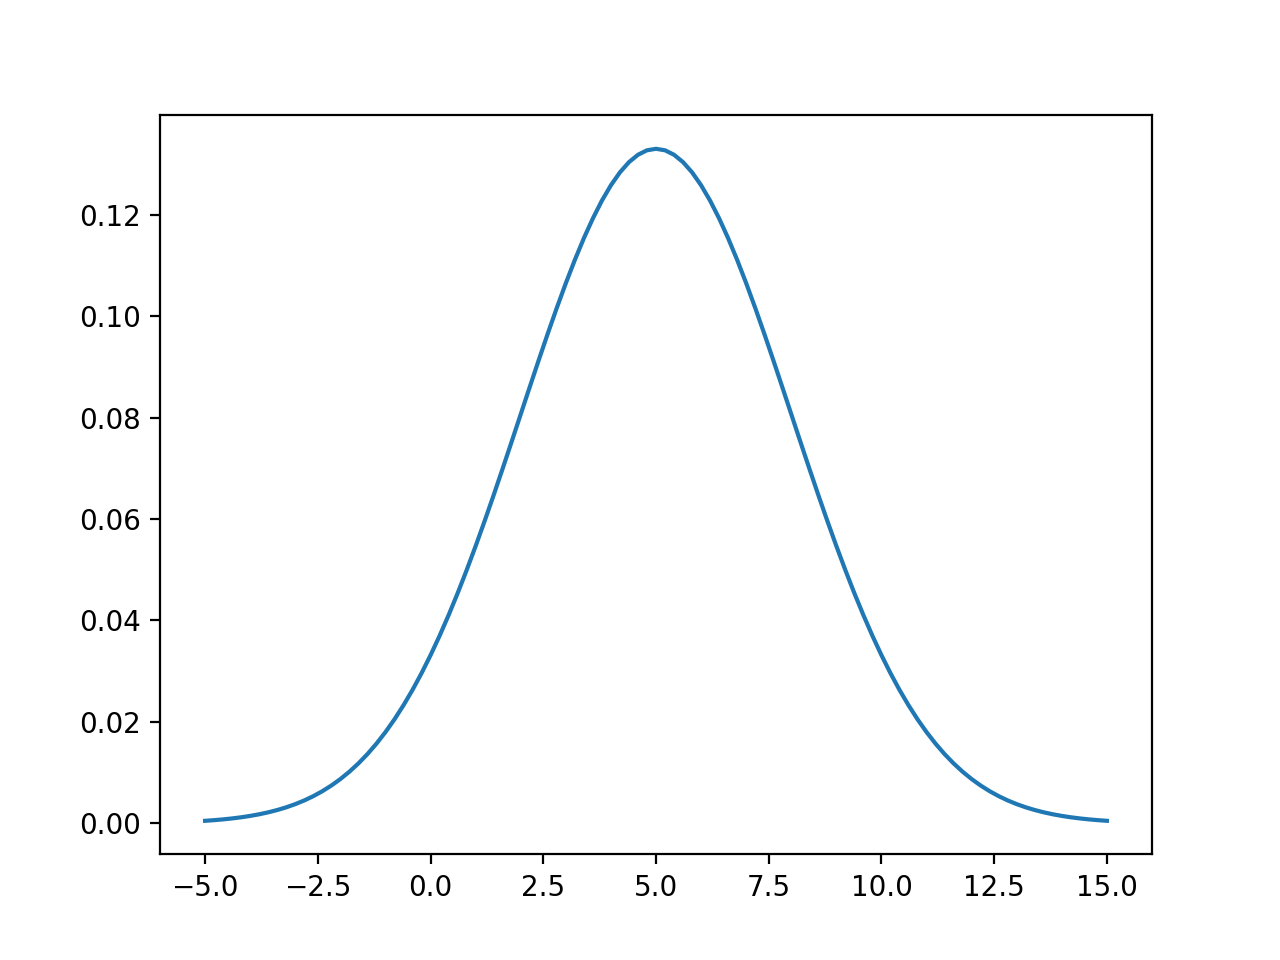

In [21]:
%matplotlib notebook
import matplotlib.pyplot as plt

plt.figure()
plt.plot(x,y1,'-');

<IPython.core.display.Javascript object>


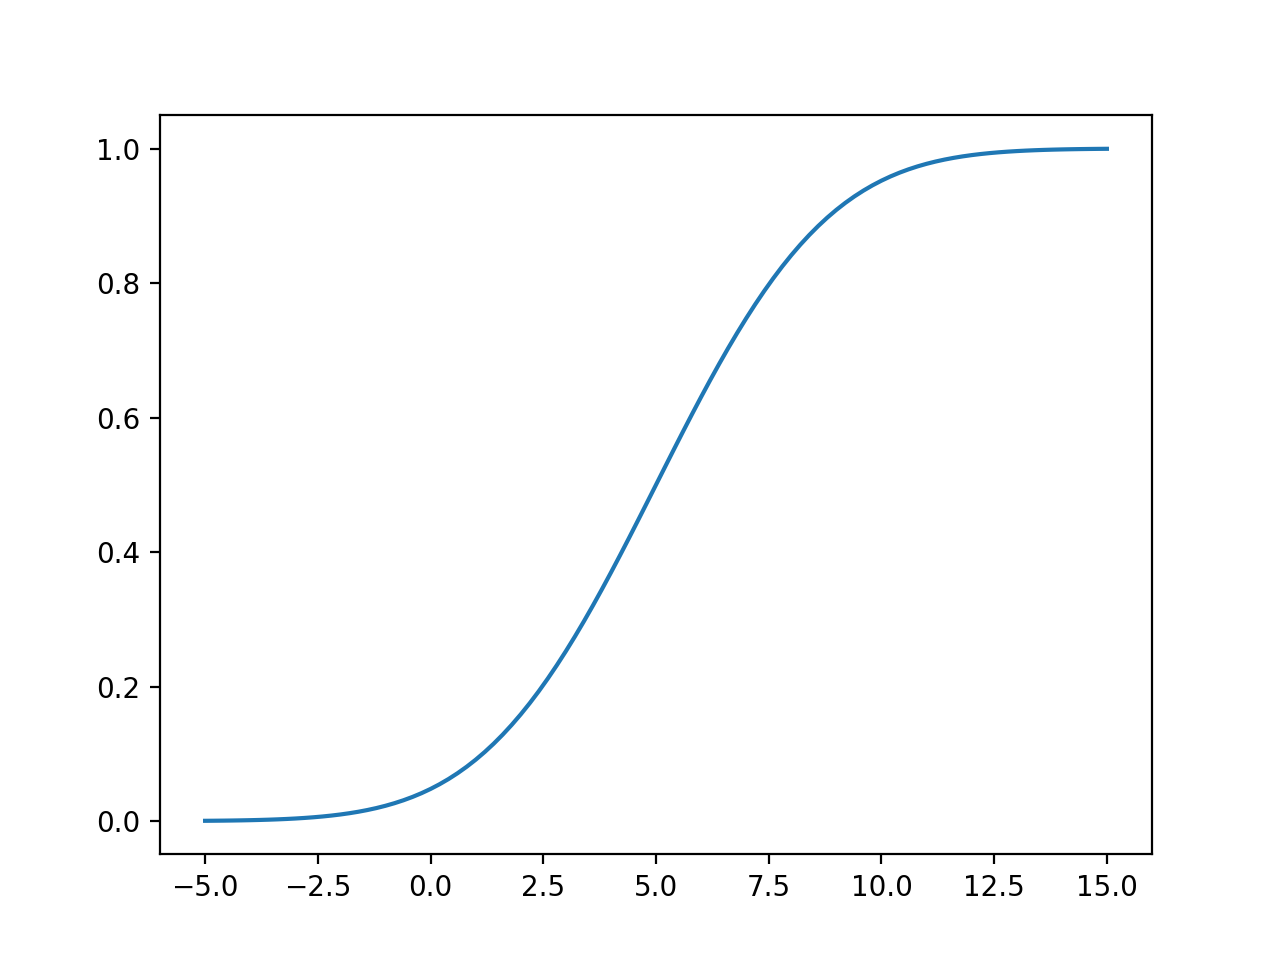

In [22]:
plt.figure()
plt.plot(x,y2,'-');

<IPython.core.display.Javascript object>


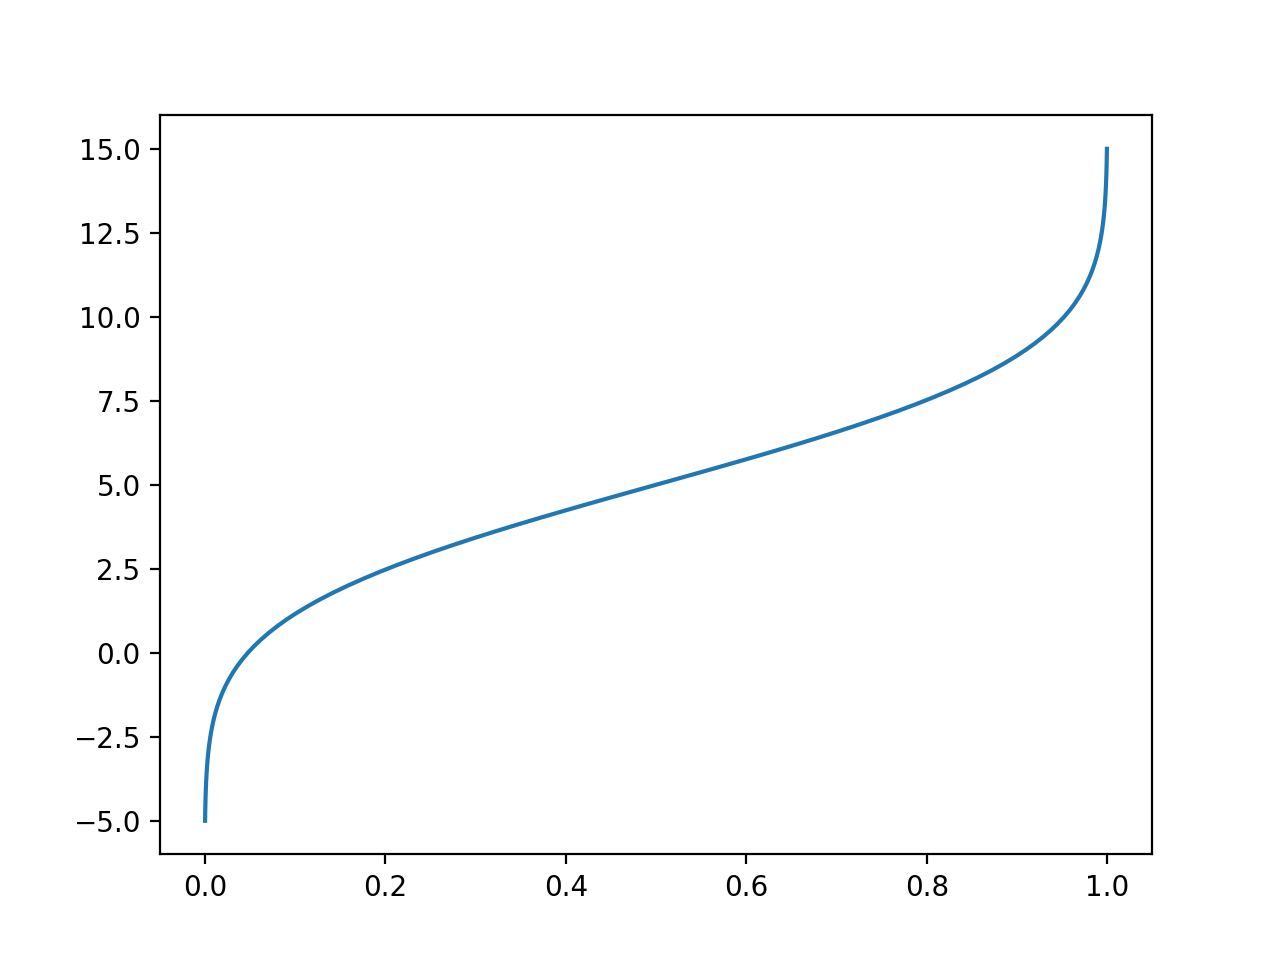

In [23]:
plt.figure()
x1 = np.linspace(0,1, len(y3))
plt.plot(y2,y3,'-');

Distribución acumulada empírica

In [26]:
x = stats.norm.rvs(loc=0,scale=1,size=1000) # distribucion normal estandar
x = np.sort(x) # odenamos los valores de la variable
n = x.size # tamano de la muestra
y = np.arange(1, n+1) / n # % acumulado

<IPython.core.display.Javascript object>


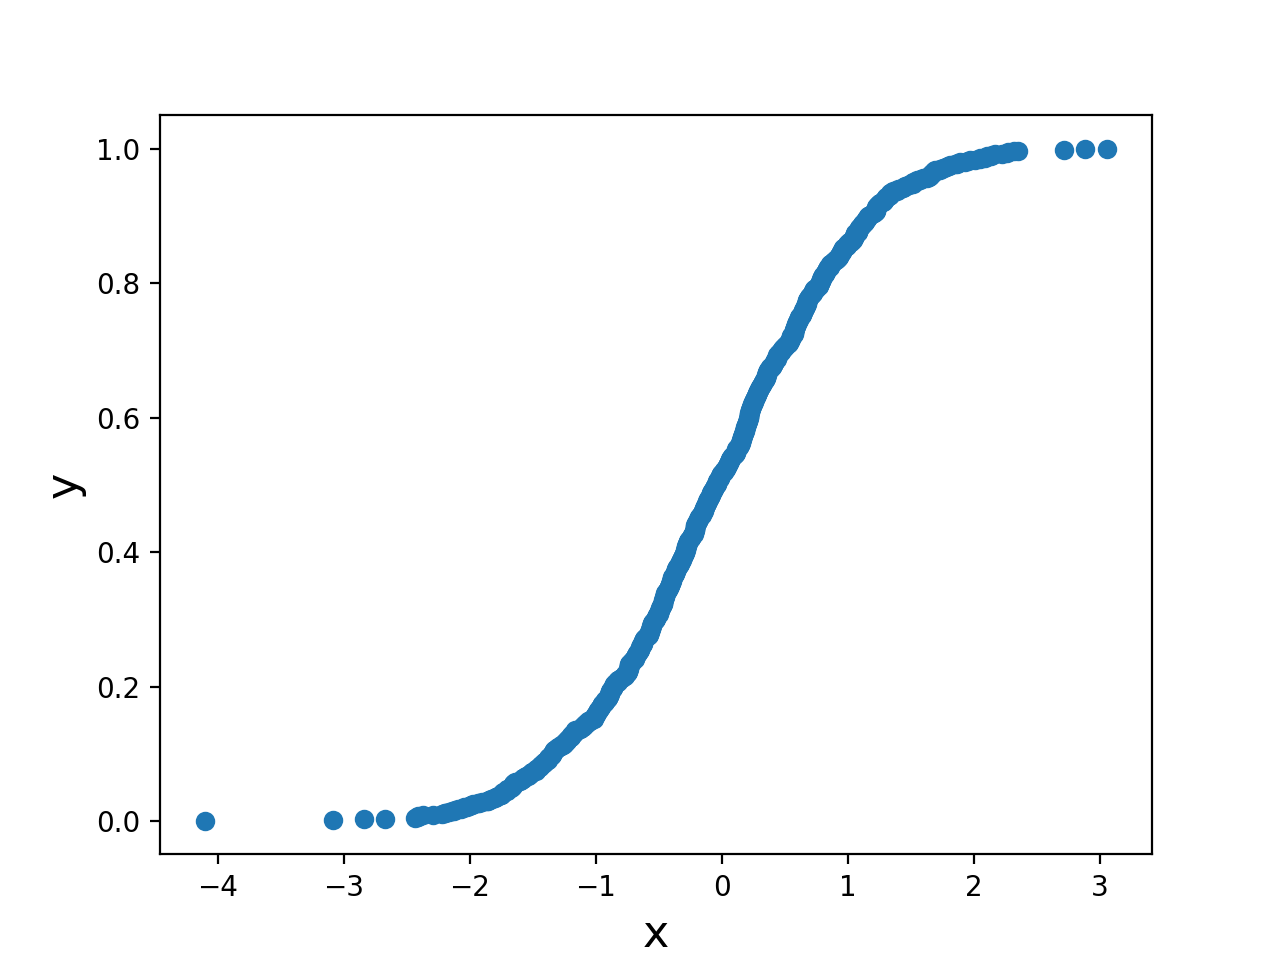

Text(0, 0.5, 'y')

In [27]:
plt.figure()
plt.scatter(x=x, y=y);
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)

In [28]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(x)

In [29]:
ecdf(1.5)

0.9470000000000001

QQ plot

In [30]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html#scipy.stats.probplot
nsample = 100
np.random.seed(7654321)

<IPython.core.display.Javascript object>


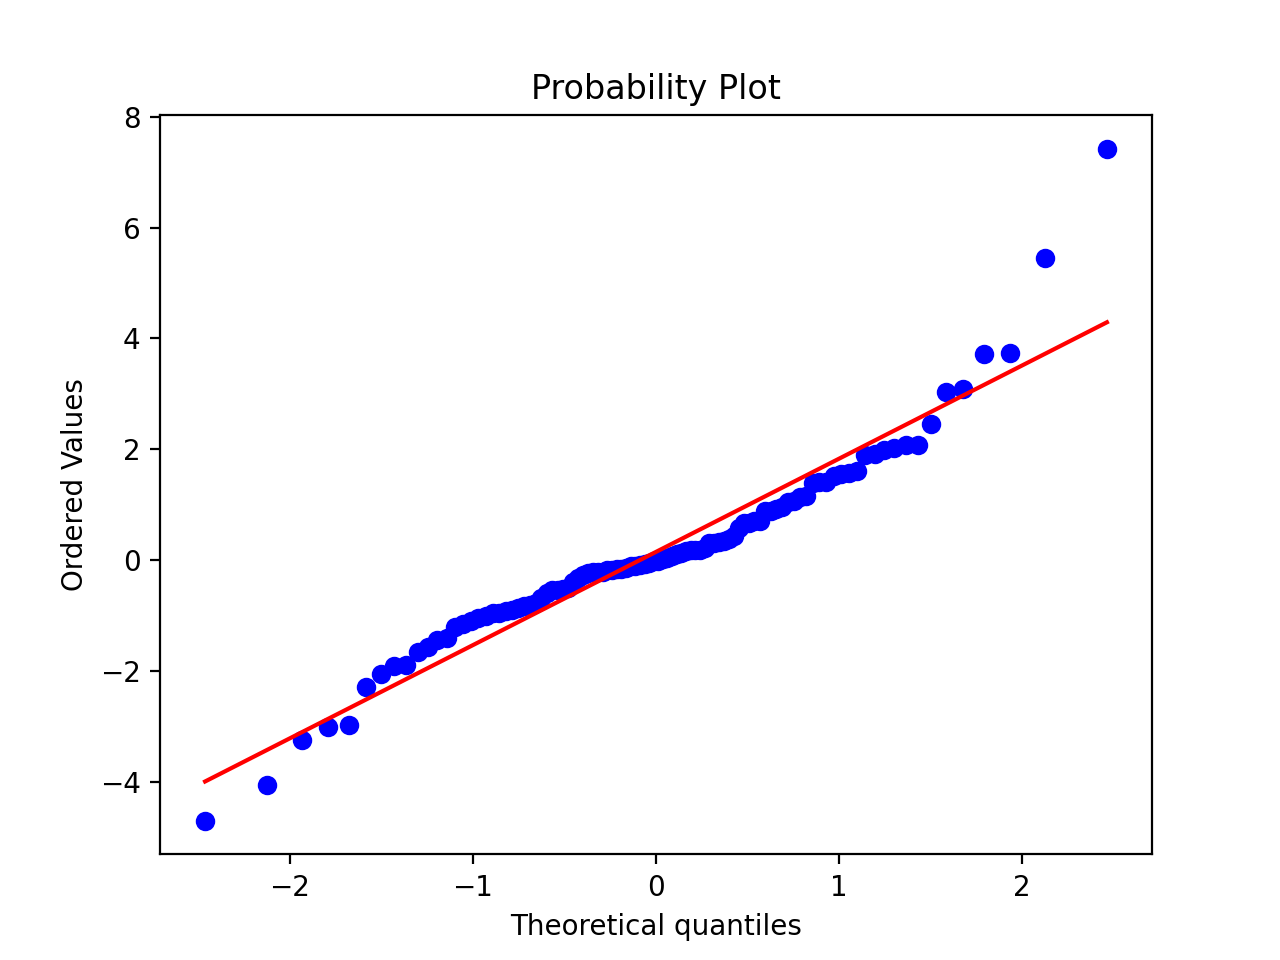

In [31]:
plt.figure()
x = stats.t.rvs(df=3, size=nsample)
res = stats.probplot(x, plot=plt)

## Test sobre una y dos muestras

Se introducen dos funciones: `stats.ttest_1samp` y `stats.wilcoxon` para el test t y el test de Wilcoxon respectivamente. Ambos pueden ser usados para una muestra o dos muestras así como para datos pareados. Note que el test de Wilcoxon para dos muestras es lo mismo que el test de Mann–Whitney.

### El test t

Este test se basa en el supuesto de normalidad de los datos. Es decir que los datos $x_1\ldots,x_n$ se asumen como realizaciones independientes de variables aleatorias con media $\mu$ y varianza $\sigma^2$, $N(\mu, \sigma^2)$. Se tiene que la hipótesis nula es que $\mu=\mu_0$.

Se puede estimar los parámetros $\mu$ y $\sigma$ por la media $\bar{x}$ y la desviación estándar  $\sigma$, aunque recuerde que solo son estimaciones del valor real.

Veamos un ejemplo del consuo diario de calorías de 11 mujeres:

In [32]:
daily_intake = [5260,5470,5640,6180,6390,6515,
                  6805,7515,7515,8230,8770]

Veamos algunas estadísticas de resumen:

In [33]:
stats.describe(daily_intake)

DescribeResult(nobs=11, minmax=(5260, 8770), mean=6753.636363636364, variance=1304445.4545454546, skewness=0.3674679616524392, kurtosis=-0.9757942883536157)

Se podría querer saber si el consumo de energía de las mujeres se desvía de una valor recomendado de $7725$. Asumiendo que los datos vienen de una distribución normal, el objetivo es hacer una prueba para saber si la media de la distribución es $\mu = 7725$.

In [34]:
stats.ttest_1samp(daily_intake,7725)

Ttest_1sampResult(statistic=-2.8207540608310198, pvalue=0.018137235176105812)

In [35]:
t, pval = stats.ttest_1samp(daily_intake,7725)

In [36]:
t

-2.8207540608310198

In [37]:
pval

0.018137235176105812

### Wilcoxon

In [38]:
(rank, pVal) = stats.wilcoxon(x=(np.array(daily_intake)-7725))

In [39]:
(rank, pVal)

(8.0, 0.0244140625)

Para efectos prácticos, cuando se trata de una muestra, el test t y el de Wilcoxon suelen arrojar resultados muy similares.

## Test t para dos muestras

Se usa esta prueba con la hipótesis nula de que dos muestras provengan de distribuciones normales con la misma media.

Se puede tener dos enfoques, que las muestras tengan la misma varianza (enfoque clásico) o difieran en varianza.

In [41]:
import numpy as np
from scipy import stats
import os as os
import pandas as pd
#os.chdir('C:/Users/VICTOR/Documents/AnalyticsPython/Data')

energy = pd.read_csv('Data/energy.csv')
energy.head()


,expend,stature
0,9.21,obese
1,7.53,lean
2,7.48,lean
3,8.08,lean
4,8.09,lean


In [42]:
g1 = energy[energy.stature=='obese'].expend.values
g2 = energy[energy.stature=='lean'].expend.values
stats.ttest_ind(g2,g1,equal_var=False)

Ttest_indResult(statistic=-3.855503558973697, pvalue=0.0014106918447179043)

In [43]:
stats.ttest_ind(g2,g1,equal_var=True)

Ttest_indResult(statistic=-3.9455649161549835, pvalue=0.0007989982111700593)

### Comparación de varianzas

Aún cuando en `python` se puede hacer la prueba sobre dos muestras sin el supuesto de igualdad en las varianzas, podrías estar interesado en hacer una prueba exclusiva de este supuesto.

In [44]:
import statistics 
F = statistics.variance(g2)/statistics.variance(g1)
df1 = len(g1) - 1
df2 = len(g2) - 1
alpha = 0.05 
p_value = stats.f.cdf(F, df2, df1)
(F,p_value*2)

(0.7844459792357035, 0.6797459853760682)

### Test de Wilcoxon para dos muestras

In [45]:
u_statistic, pVal = stats.mannwhitneyu(g1, g2)

In [46]:
(u_statistic, pVal*2)

(105.0, 0.004243226771760098)

## Correlación


Se aborda a continuación medidas de correlación paramétricas y no paramétricas. El coeficiente de correlación es una medida de asociación que varía entre -1 y 1.

### Correlación de Pearson

El coeficiente de correlación empírico es:

$$ r = \frac{\sum (x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum (x_i-\bar{x})^2\sum (y_i-\bar{y})^2}} $$

La función cor en `python` calcula la correlación entre dos o más vectores.

In [48]:
#import os as os
#os.chdir('C:/Users/VICTOR/Documents/AnalyticsPython/Data')
import pandas as pd
datos = pd.read_csv('Data/company_sales_data.csv')

In [155]:
datos

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600
5,6,2760,1555,4890,7490,1890,1555,20140,201400
6,7,2980,1120,4780,8980,1780,1120,29550,295500
7,8,3700,1400,5860,9960,2860,1400,36140,361400
8,9,3540,1780,6100,8100,2100,1780,23400,234000
9,10,1990,1890,8300,10300,2300,1890,26670,266700


<IPython.core.display.Javascript object>


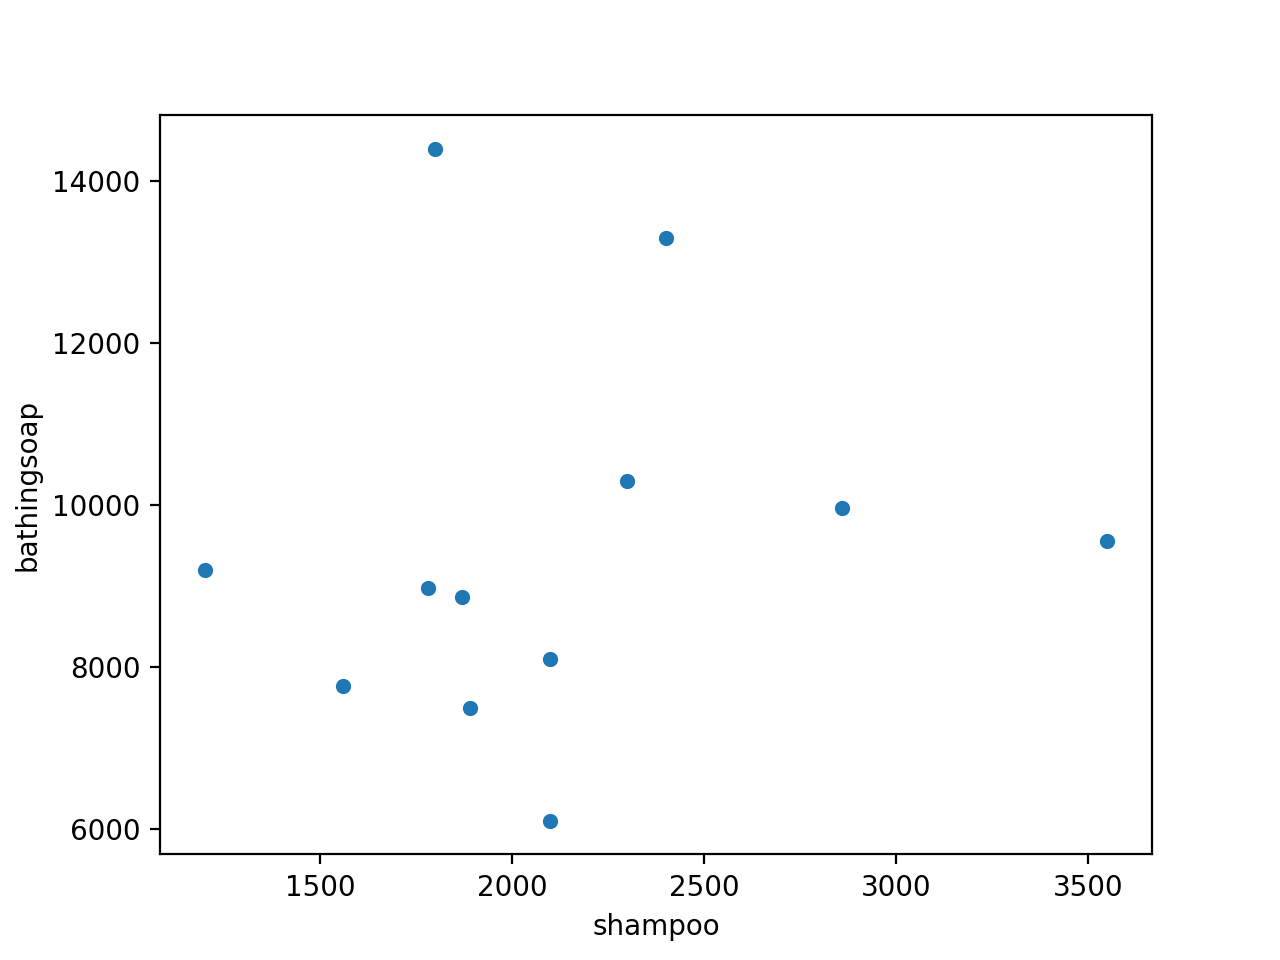

<AxesSubplot:xlabel='shampoo', ylabel='bathingsoap'>

In [49]:
datos.plot('shampoo','bathingsoap',kind = 'scatter')

In [50]:
np.corrcoef(datos.shampoo,datos.bathingsoap)

array([[1.        , 0.13756757],
       [0.13756757, 1.        ]])

In [51]:
stats.pearsonr(datos.shampoo,datos.bathingsoap) # devuelve la correlacion y el p-valor

(0.1375675688230804, 0.669853167345746)

In [52]:
stats.spearmanr(datos.shampoo,datos.bathingsoap)   # Spearman's rho

SpearmanrResult(correlation=0.2907184843604137, pvalue=0.35929281767147814)

In [53]:
stats.kendalltau(datos.shampoo,datos.bathingsoap)  # Kendall's tau

KendalltauResult(correlation=0.10687334289668038, pvalue=0.6304167324095719)

Interpretación de la correlación:

-  La correlación esta siempre entre -1 y 1. Lo primero que se interpreta es el signo
-  Directamente proporcional si es positivo, si es negativo pasa lo contrario
-  En segundo lugar se interpreta es la fuerza de la relación. Si esta más cerca de 1, significa que si aumenta una variable, la otra también.
-  Números intermedios, reducen la fuerza de la relación.

# Regresión lineal

Abordemos las primeras ideas de regresión lineal a través de un ejemplo práctico:

-  Creamos dos variables, Ingreso y Consumo Esperado

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import statsmodels.formula.api as stm
from statsmodels.graphics.regressionplots import abline_plot


df = pd.DataFrame({
    'Col1': [1,2,3],
    'Col2': [4,5,6]
    })


familia = pd.DataFrame({'Y':[55,60,65,70,75,
                        65,70,74,80,85,88,
                        79,84,90,94,98,
                        80,93,95,103,108,113,115,
                        102,107,110,116,118,125,
                        110,115,120,130,135,140,
                        120,136,140,144,145,
                        135,137,140,152,157,160,162,
                        137,145,155,165,175,189,
                        150,152,175,178,180,185,191
                        ],'X':[80,80,80,80,80,
                   100,100,100,100,100,100,
                   120,120,120,120,120,
                   140,140,140,140,140,140,140,
                   160,160,160,160,160,160,
                   180,180,180,180,180,180,
                   200,200,200,200,200,
                   220,220,220,220,220,220,220,
                   240,240,240,240,240,240,
                   260,260,260,260,260,260,260
                   ]})
familia.head()

,Y,X
0,55,80
1,60,80
2,65,80
3,70,80
4,75,80


In [55]:
ingresos = np.arange(80,261,20)
ingresos
consumoEsperado = [65,77,89,101,113,125,137,149,161,173]
consumoEsperado


familia.columns

Index(['Y', 'X'], dtype='object')

<IPython.core.display.Javascript object>


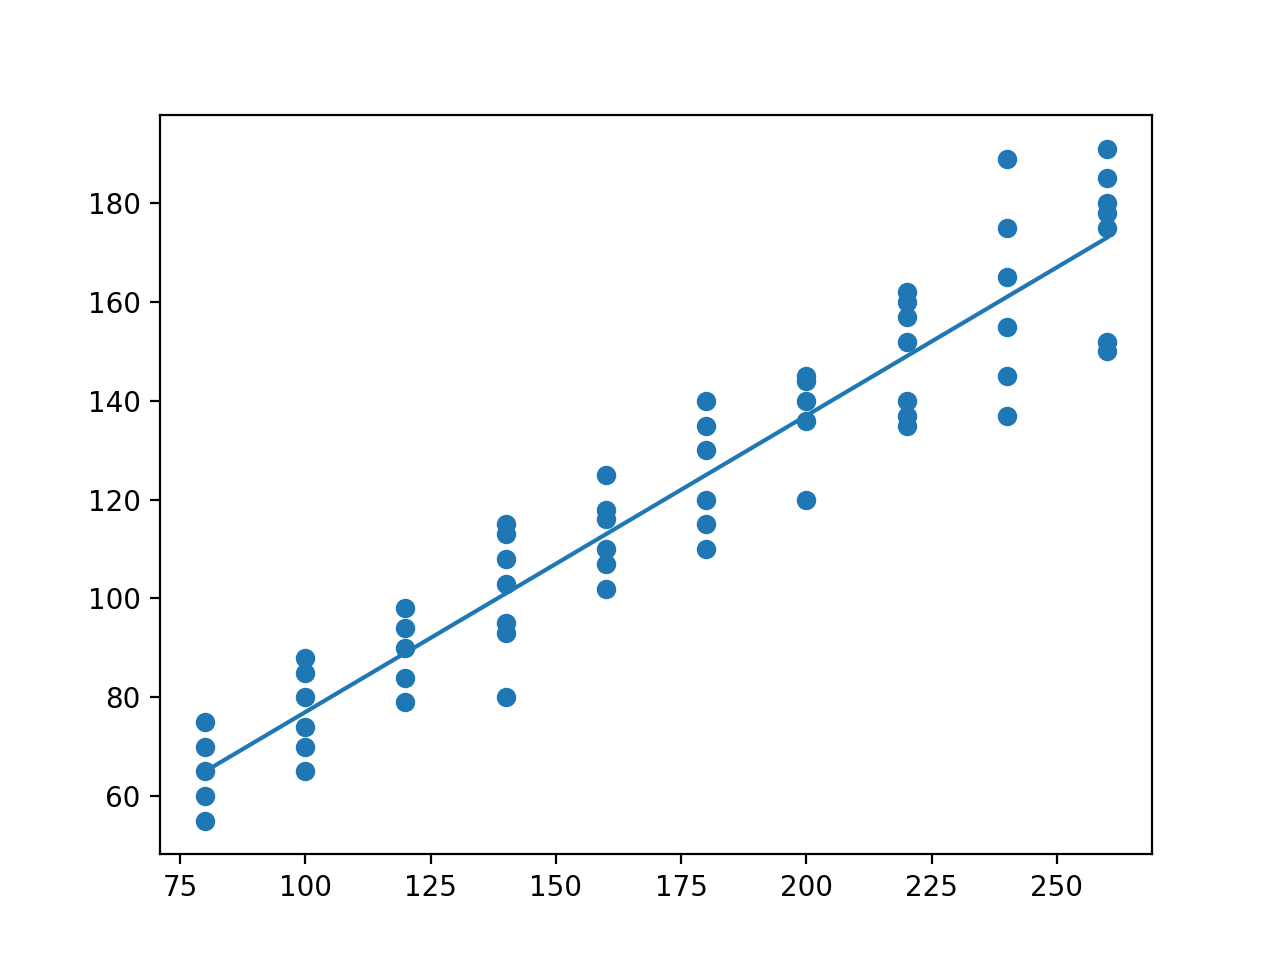

In [56]:
plt.figure() # llama al dispositivo grafico
plt.plot(ingresos,consumoEsperado)
plt.scatter(familia['X'],familia['Y'])
plt.show()

¿Qué hemos hecho?

$$ E(Y|X_i) = f(X_i)$$

$$E(Y|X_i) = \beta_1+\beta_2X_i$$

$$ u_i = Y_i - E(Y|X_i) $$

$$ Y_i = E(Y|X_i) + u_i$$


¿Qué significa que sea lineal?

El término regresión lineal siempre significará una regresión lineal en los parámetros; los $\beta$ (es decir, los parámetros) se elevan sólo a la primera potencia. Puede o no ser lineal en las variables explicativas $X$.

Para evidenciar la factibilidad del uso de RL en este caso, vamos a obtener una muestra de la población:

In [57]:
nS = familia.shape
type(nS)
indice = np.arange(0,nS[0])
indice # Creamos una variable indicadora para obtener una muestra

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59])

In [58]:
random.seed(8519)
muestra = random.sample(list(indice),k = 20) # cambio de array a lista
muestra # samos sample para obtener una muestra sin reemplazo del tamaño indicado

[54, 59, 33, 25, 32, 39, 47, 51, 18, 3, 34, 12, 29, 7, 26, 5, 56, 50, 44, 13]

In [59]:
ingreso_muestra = familia.loc[muestra,'X']
consumo_muestra = familia.loc[muestra,'Y']

In [60]:
df = pd.DataFrame(list(zip(consumo_muestra,ingreso_muestra)),columns = ['consumo_muestra','ingreso_muestra'])
ajuste_1 = stm.ols('consumo_muestra~ingreso_muestra',data =df).fit()

print(ajuste_1.summary())

                            OLS Regression Results                            
Dep. Variable:        consumo_muestra   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           8.44e-11
Time:                        19:57:24   Log-Likelihood:                -76.677
No. Observations:                  20   AIC:                             157.4
Df Residuals:                      18   BIC:                             159.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          13.2650      8.817     

<IPython.core.display.Javascript object>


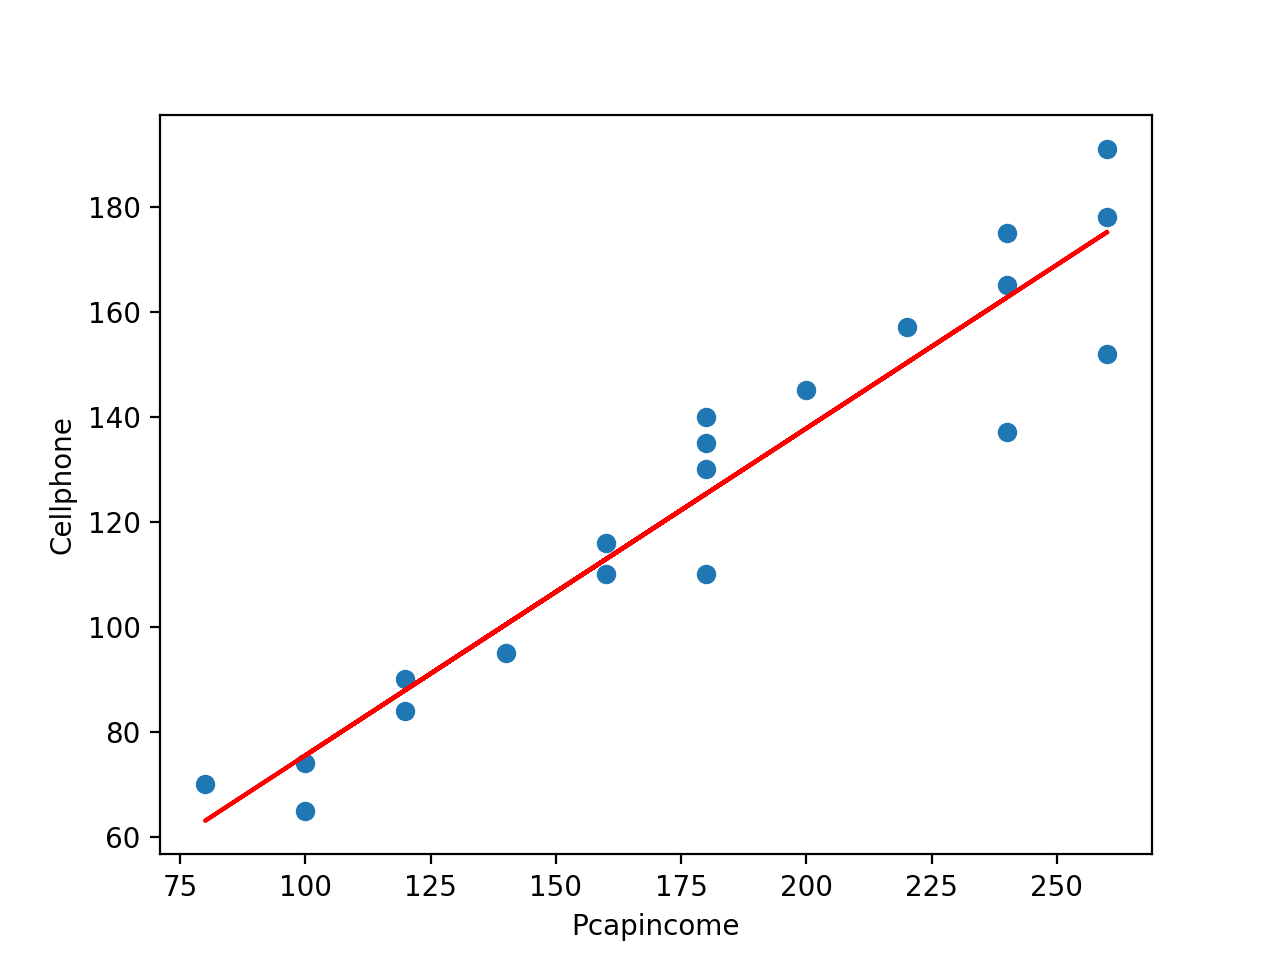

Text(0, 0.5, 'Cellphone')

In [61]:
plt.figure()
plt.plot(df.ingreso_muestra,df.consumo_muestra,'o')
plt.plot(df.ingreso_muestra,ajuste_1.fittedvalues,'-',color='r')
plt.xlabel('Pcapincome')
plt.ylabel('Cellphone')


## Regresión: Paso a paso

La función poblacional sería:

$$
Y_i = \beta_1 + \beta_2X_i+u_i
$$

Como no es observable, se usa la muestral

$$
Y_i=\hat{\beta}_1+\hat{\beta}_2X_i+\hat{u}_i
$$


$$
Y_i=\hat{Y}_i+\hat{u}_i
$$


$$
\hat{u}_i = Y_i-\hat{Y}_i
$$


$$
\hat{u}_i = Y_i- \hat{\beta}_1-\hat{\beta}_2X_i
$$


Es por esto que los residuos se obtienen a través de los betas:


$$
\sum\hat{u}_i^2 =\sum (Y_i- \hat{\beta}_1-\hat{\beta}_2X_i)^2
$$


$$
\sum\hat{u}_i^2 =f(\hat{\beta}_1,\hat{\beta}_2)
$$


Diferenciando se obtiene:

$$
 \hat{\beta}_2 = \frac{S_{xy}}{S_{xx}}
$$

$$
 \hat\beta_1 = \bar{Y} -  \hat\beta_2\bar{X}
$$
donde 

$$
S_{xx} = \sum_{i=1}^{n}x_i^2-n\bar{x}^2
$$

$$
S_{xy} = \sum_{i=1}^{n}x_i y_i-n\bar{x}\bar{y}
$$


Abrimos la `tabla3.2`, vamos a obtener:

-  salario promedio por hora (Y) y 
-  los años de escolaridad (X).


In [65]:
consumo = pd.read_csv('https://raw.githubusercontent.com/vmoprojs/DataLectures/master/GA/Tabla3_2.csv',
                      sep = ';',decimal = '.')


consumo.head()

,Y,X
0,70,80
1,65,100
2,90,120
3,95,140
4,110,160


In [66]:
media_x = np.mean(consumo['X'])
media_y = np.mean(consumo['Y'])


n = consumo.shape[0]

sumcuad_x = np.sum(consumo['X']*consumo['X'])
sum_xy = np.sum(consumo['X']*consumo['Y'])

beta_som = (sum_xy-n*media_x*media_y)/(sumcuad_x-n*(media_x**2))
alpha_som = media_y-beta_som*media_x
(alpha_som,beta_som)

(24.454545454545467, 0.509090909090909)

Verificamos lo anterior mediante:

In [67]:
reg_1 = stm.ols('Y~X',data = consumo)
print(reg_1.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     202.9
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           5.75e-07
Time:                        19:58:21   Log-Likelihood:                -31.781
No. Observations:                  10   AIC:                             67.56
Df Residuals:                       8   BIC:                             68.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.4545      6.414      3.813      0.0

/Users/victormorales/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Veamos cómo queda nuestra estimación:

In [68]:
y_ajustado = alpha_som+beta_som*consumo['X']

dfAux = pd.DataFrame(list(zip(consumo['X'],y_ajustado)),
                     columns = ['X','y_ajustado'])
dfAux

,X,y_ajustado
0,80,65.181818
1,100,75.363636
2,120,85.545455
3,140,95.727273
4,160,105.909091
5,180,116.090909
6,200,126.272727
7,220,136.454545
8,240,146.636364
9,260,156.818182


In [69]:
e = consumo['Y']-y_ajustado


dfAux = pd.DataFrame(list(zip(consumo['X'],consumo['Y'],y_ajustado,e)),
                     columns = ['X','Y','y_ajustado','e'])

dfAux

,X,Y,y_ajustado,e
0,80,70,65.181818,4.818182
1,100,65,75.363636,-10.363636
2,120,90,85.545455,4.454545
3,140,95,95.727273,-0.727273
4,160,110,105.909091,4.090909
5,180,115,116.090909,-1.090909
6,200,120,126.272727,-6.272727
7,220,140,136.454545,3.545455
8,240,155,146.636364,8.363636
9,260,150,156.818182,-6.818182


In [70]:
np.mean(e)
np.corrcoef(e,consumo['X'])

array([[1.00000000e+00, 1.13838806e-15],
       [1.13838806e-15, 1.00000000e+00]])

In [71]:
SCT = np.sum((consumo['Y']-media_y)**2)
SCE = np.sum((y_ajustado-media_y)**2)
SCR = np.sum(e**2)

R_2 = SCE/SCT
R_2


0.9620615604867568

In [72]:
print(reg_1.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     202.9
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           5.75e-07
Time:                        19:58:34   Log-Likelihood:                -31.781
No. Observations:                  10   AIC:                             67.56
Df Residuals:                       8   BIC:                             68.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.4545      6.414      3.813      0.0

/Users/victormorales/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Otro ejemplo

$$
H_0:\beta_2=0
$$
$$
H_1:\beta_2\neq 0
$$

In [74]:
uu = 'https://raw.githubusercontent.com/vmoprojs/DataLectures/master/GA/table2_8.csv'

datos = pd.read_csv(uu,sep = ';')
datos.shape
datos.columns
m1 = stm.ols('FOODEXP~TOTALEXP',data = datos)
print(m1.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                FOODEXP   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     31.10
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           8.45e-07
Time:                        19:58:58   Log-Likelihood:                -308.16
No. Observations:                  55   AIC:                             620.3
Df Residuals:                      53   BIC:                             624.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     94.2088     50.856      1.852      0.0

Regresamos el gasto total en el gasto en alimentos

¿Son los coeficientes diferentes de cero?

In [75]:
import scipy.stats as st


t_ho = 0
t1 = (0.4368-t_ho)/ 0.078
(1-st.t.cdf(t1,df = 53))



3.8888077047438685e-07

In [76]:

t_ho = 0.3
t1 = (0.4368-t_ho)/ 0.078
(1-st.t.cdf(np.abs(t1),df = 53))

0.04261898819196597

Interpretación de los coeficientes

-  El coeficiente de la variable dependiente mide la tasa de cambio (derivada=pendiente) del modelo
-  La interpretación suele ser *En promedio, el aumento de una unidad en la variable independiente produce un aumento/disminución de $\beta_i$ cantidad en la variable dependiente*
-  Interprete la regresión anterior.

### Práctica: Paridad del poder de compra

In [77]:
uu = "https://raw.githubusercontent.com/vmoprojs/DataLectures/master/GA/Tabla5_9.csv"

datos = pd.read_csv(uu,sep = ';')
datos.head()

,COUNTRY,BMACLC,BMAC$,EXCH,PPP,LOCALC
0,United States,2.54,2.54,-99999.00,-99999.00,-99999
1,Argentina,2.50,2.50,1.00,0.98,-40
2,Australia,3.00,1.52,1.98,1.18,-35
3,Brazil,3.60,1.64,2.19,1.42,-31
4,Britain,1.99,2.85,1.43,1.28,12


In [78]:
datos['EXCH'] = datos.EXCH.replace(to_replace= -99999, value=np.nan)
datos['PPP'] = datos.PPP.replace(to_replace = -99999, value = np.nan)
datos['LOCALC'] = datos.LOCALC.replace(to_replace= -99999, value = np.nan)

datos.head()

,COUNTRY,BMACLC,BMAC$,EXCH,PPP,LOCALC
0,United States,2.54,2.54,NaN,NaN,NaN
1,Argentina,2.50,2.50,1.00,0.98,-40.0
2,Australia,3.00,1.52,1.98,1.18,-35.0
3,Brazil,3.60,1.64,2.19,1.42,-31.0
4,Britain,1.99,2.85,1.43,1.28,12.0


Regresamos la paridad del poder de compra en la tasa de cambio

In [79]:
reg1 = stm.ols('EXCH~PPP',data = datos)
print(reg1.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   EXCH   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     2066.
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           8.80e-28
Time:                        19:59:25   Log-Likelihood:                -205.44
No. Observations:                  30   AIC:                             414.9
Df Residuals:                      28   BIC:                             417.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -61.3889     44.987     -1.365      0.1

<IPython.core.display.Javascript object>


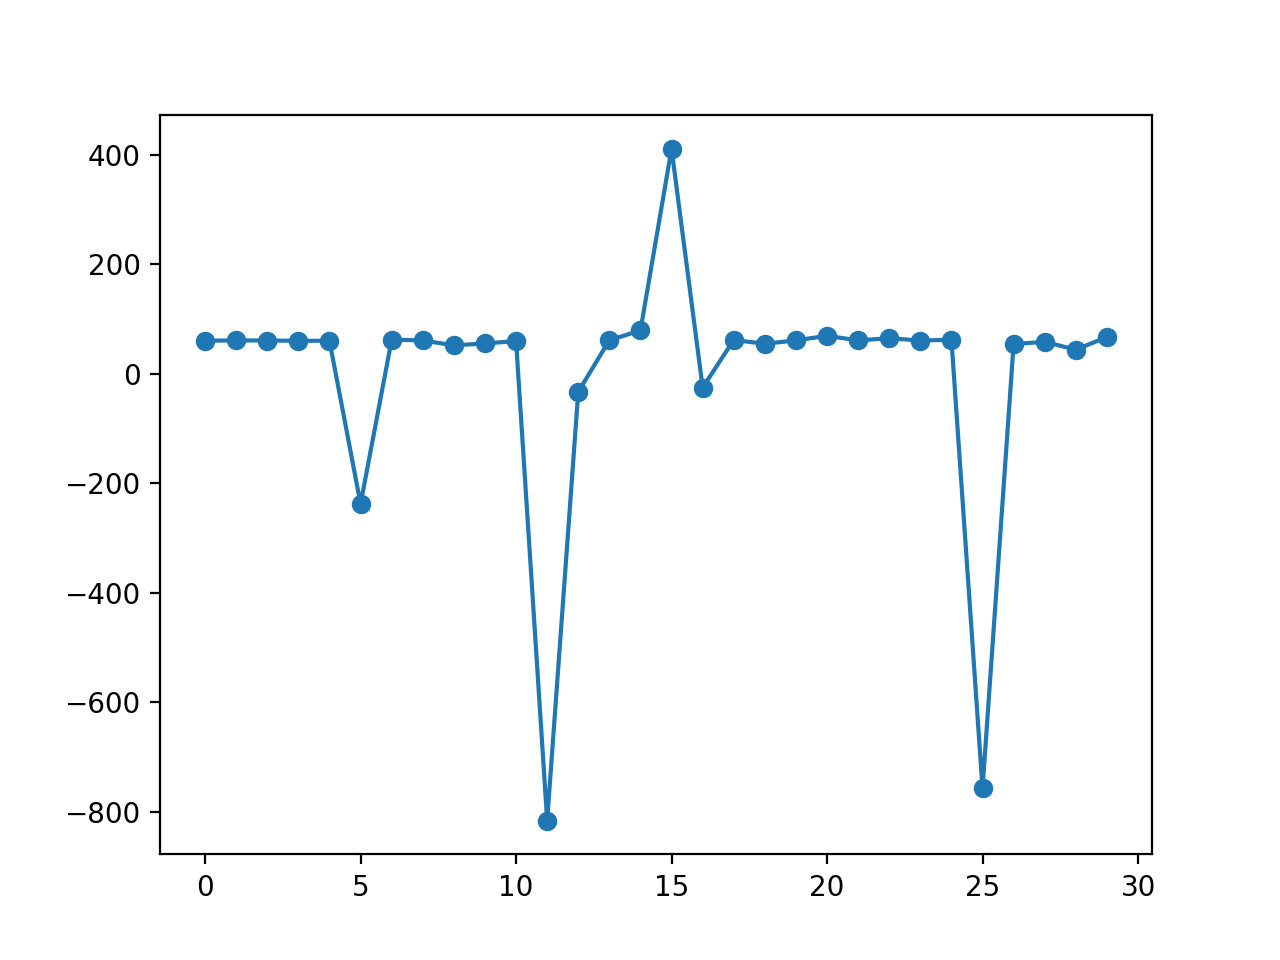

In [80]:
plt.figure()
plt.plot(np.arange(0,30),reg1.fit().resid,'-o')

In [81]:
reg3 = stm.ols('np.log(EXCH)~np.log(PPP)',data = datos)
print(reg3.fit().summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(EXCH)   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1655.
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           1.87e-26
Time:                        19:59:26   Log-Likelihood:                -7.4056
No. Observations:                  30   AIC:                             18.81
Df Residuals:                      28   BIC:                             21.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.3436      0.086      3.990      

La PPA sostiene que con una unidad de moneda debe ser posible comprar la misma canasta de bienes en todos los países.

### Práctica: Sueño

In [82]:
uu = "https://raw.githubusercontent.com/vmoprojs/DataLectures/master/WO/sleep75.csv"

datos = pd.read_csv(uu,sep = ",",header=None)
datos.columns
datos.columns = ["age","black","case","clerical","construc","educ","earns74","gdhlth","inlf", "leis1", "leis2", "leis3", "smsa", "lhrwage", "lothinc", "male", "marr", "prot", "rlxall", "selfe", "sleep", "slpnaps", "south", "spsepay", "spwrk75", "totwrk" , "union" , "worknrm" , "workscnd", "exper" , "yngkid","yrsmarr", "hrwage", "agesq"]

<IPython.core.display.Javascript object>


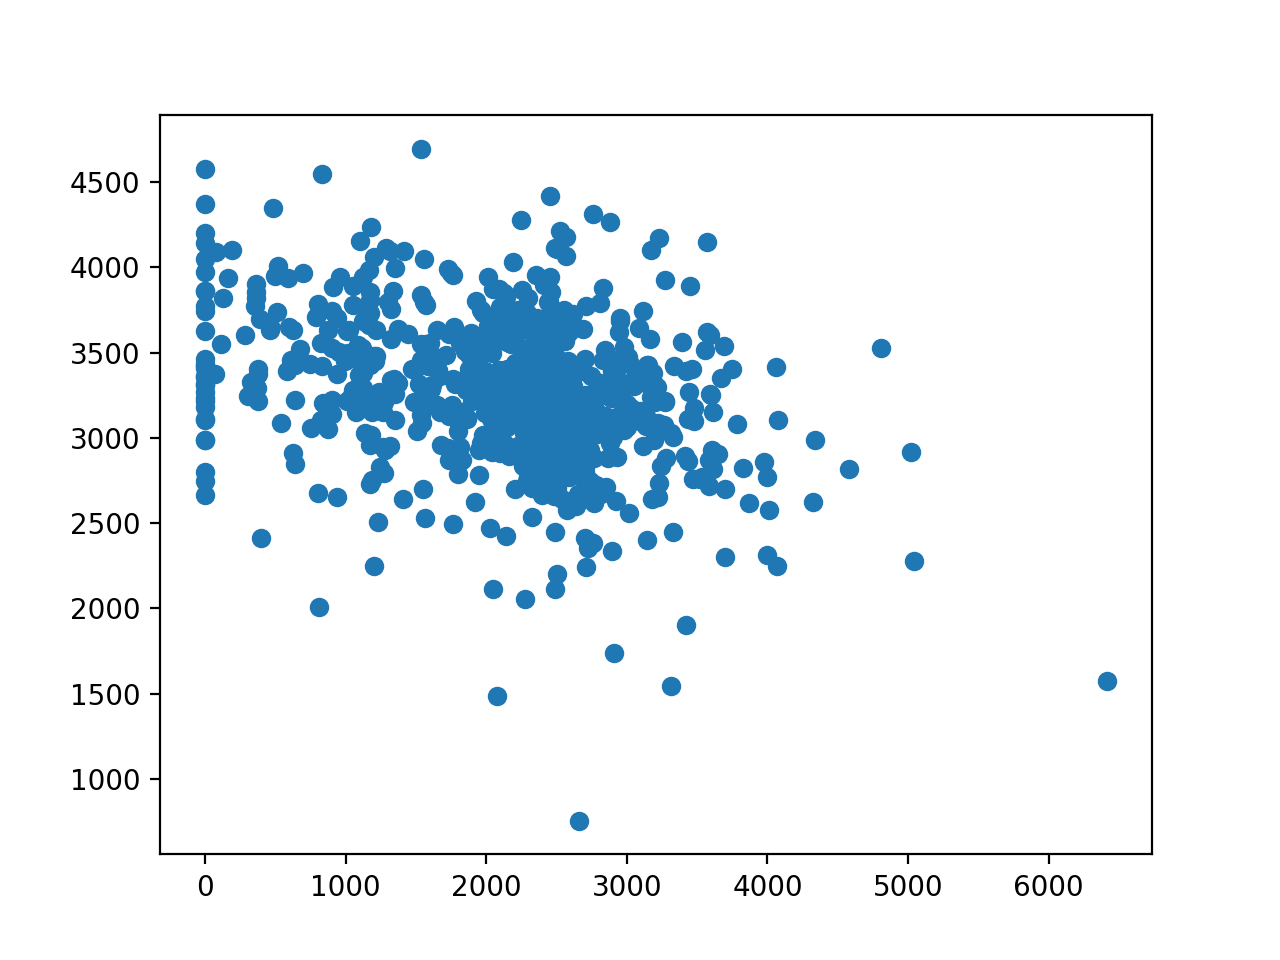

In [83]:
#totwrk: minutos trabajados por semana
# sleep: minutos dormidos por semana
plt.figure()
plt.scatter(datos['totwrk'],datos['sleep'])

In [84]:
dormir = stm.ols('sleep~totwrk',data = datos)
print(dormir.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  sleep   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     81.09
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           1.99e-18
Time:                        20:00:01   Log-Likelihood:                -5267.1
No. Observations:                 706   AIC:                         1.054e+04
Df Residuals:                     704   BIC:                         1.055e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3586.3770     38.912     92.165      0.0

Para acceder a elementos de la estimación

In [85]:
print(dormir.fit().bse)
print(dormir.fit().params)

Intercept    38.912427
totwrk        0.016740
dtype: float64
Intercept    3586.376952
totwrk         -0.150746
dtype: float64


Intervalo de confianza para $\beta_2$ y veamos los residuos

In [86]:
dormir.fit().params[1]+(-2*dormir.fit().bse[1],2*dormir.fit().bse[1])

array([-0.18422633, -0.11726532])

<IPython.core.display.Javascript object>


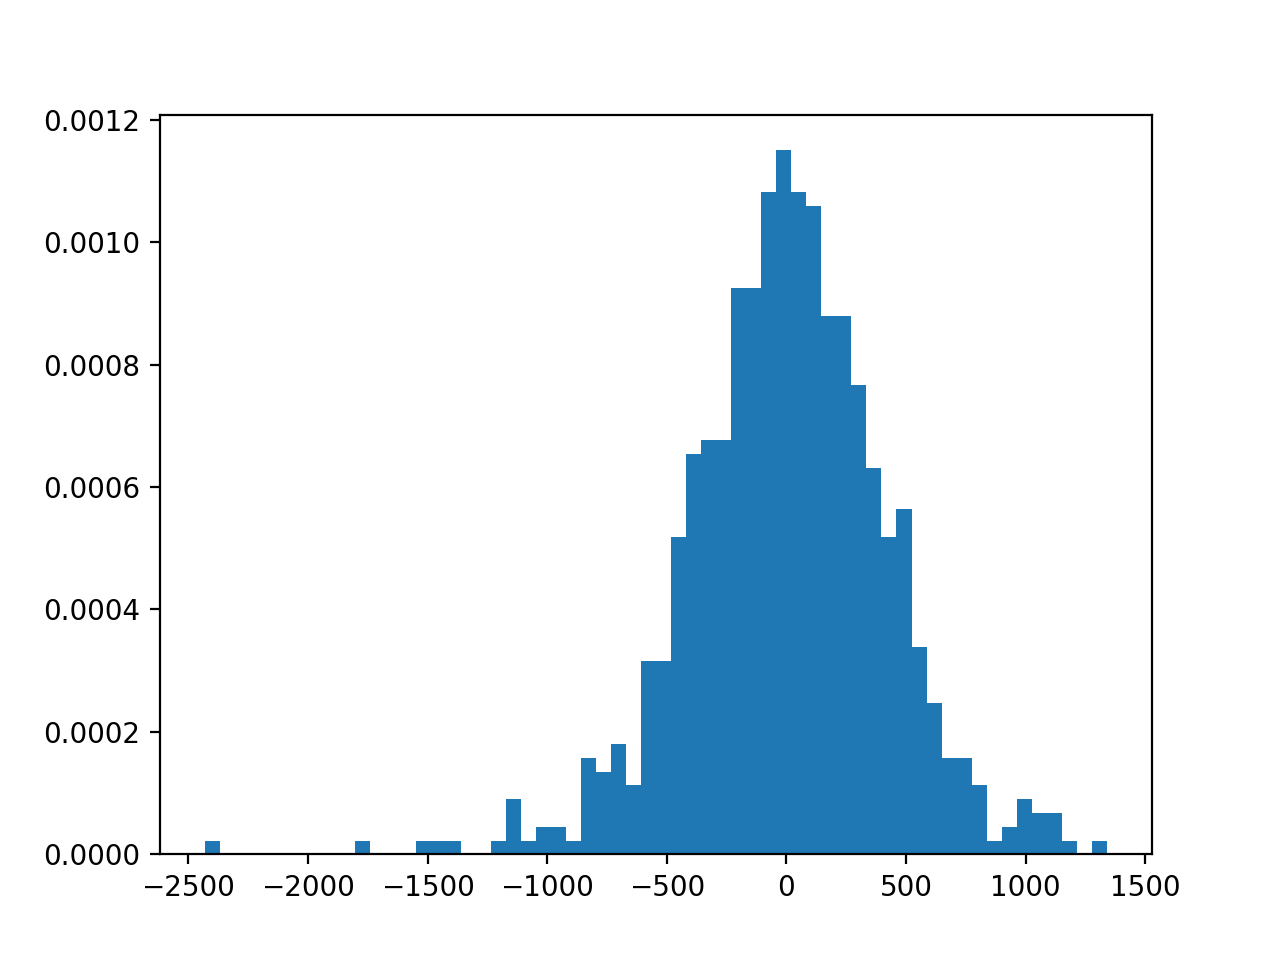

In [87]:
plt.figure()
plt.hist(dormir.fit().resid,bins = 60,density = True);

## Transformaciones lineales

In [89]:
uu = "https://raw.githubusercontent.com/vmoprojs/DataLectures/master/GA/Table%2031_3.csv"

datos = pd.read_csv(uu, sep =';')

reg_1 = stm.ols('Cellphone~Pcapincome',data = datos)
print(reg_1.fit().summary())

                            OLS Regression Results                            
Dep. Variable:              Cellphone   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     53.67
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           2.50e-08
Time:                        20:00:34   Log-Likelihood:                -148.94
No. Observations:                  34   AIC:                             301.9
Df Residuals:                      32   BIC:                             304.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.4795      6.109      2.043      0.0

<IPython.core.display.Javascript object>


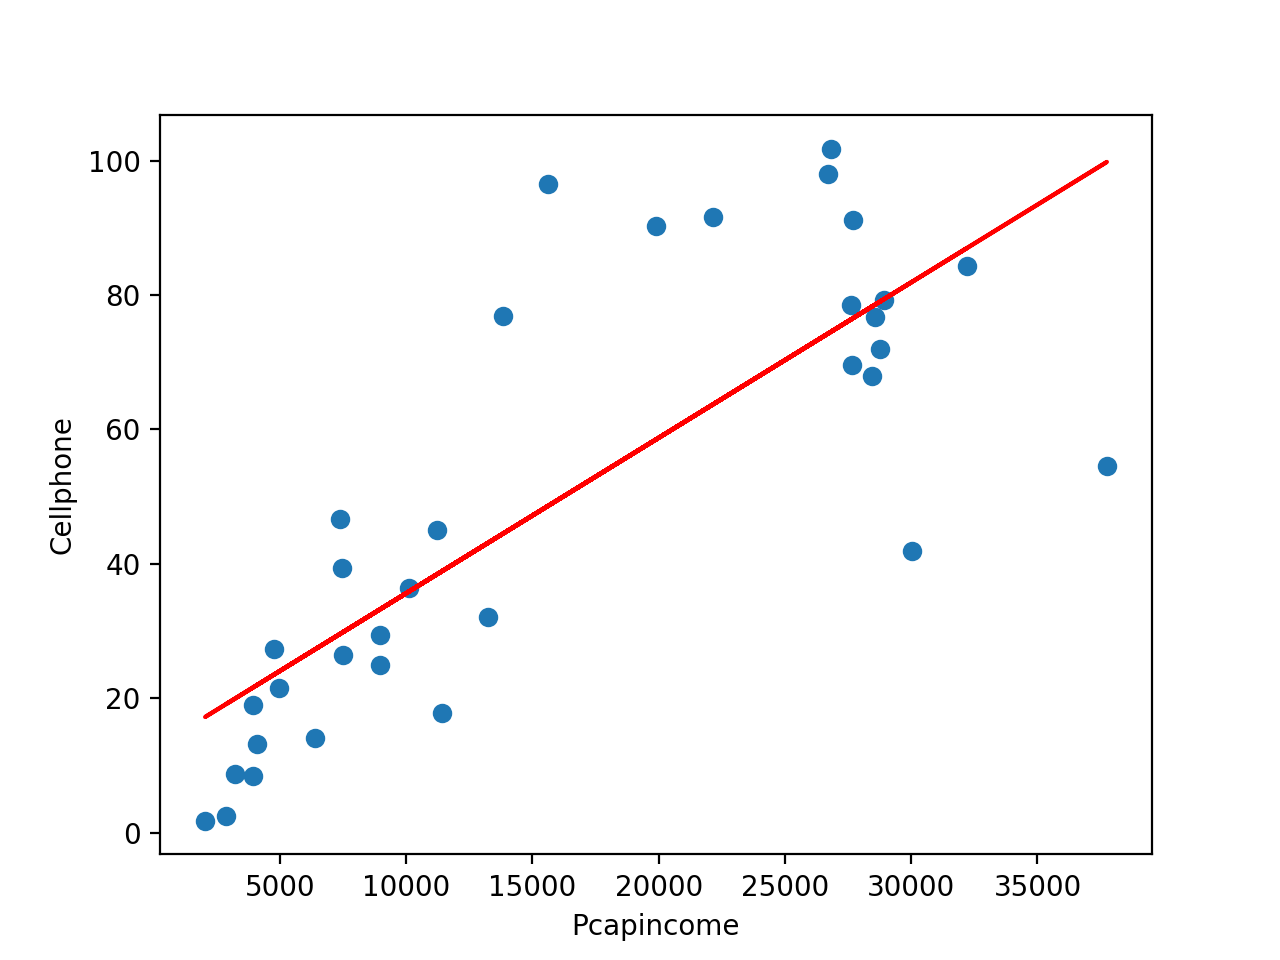

Text(0, 0.5, 'Cellphone')

In [90]:
plt.figure()
plt.plot(datos.Pcapincome,datos.Cellphone,'o')
plt.plot(datos.Pcapincome,reg_1.fit().fittedvalues,'-',color='r')
plt.xlabel('Pcapincome')
plt.ylabel('Cellphone')

### Modelo reciproco

In [91]:
uu =  "https://raw.githubusercontent.com/vmoprojs/DataLectures/master/GA/tabla_6_4.csv"
datos = pd.read_csv(uu,sep = ';')
datos.describe()

,CM,FLR,PGNP,TFR
count,64.000000,64.000000,64.000000,64.000000
mean,141.500000,51.187500,1401.250000,5.549687
std,75.978067,26.007859,2725.695775,1.508993
min,12.000000,9.000000,120.000000,1.690000
25%,82.000000,29.000000,300.000000,4.607500
50%,138.500000,48.000000,620.000000,6.040000
75%,192.500000,77.250000,1317.500000,6.615000
max,312.000000,95.000000,19830.000000,8.490000


<IPython.core.display.Javascript object>


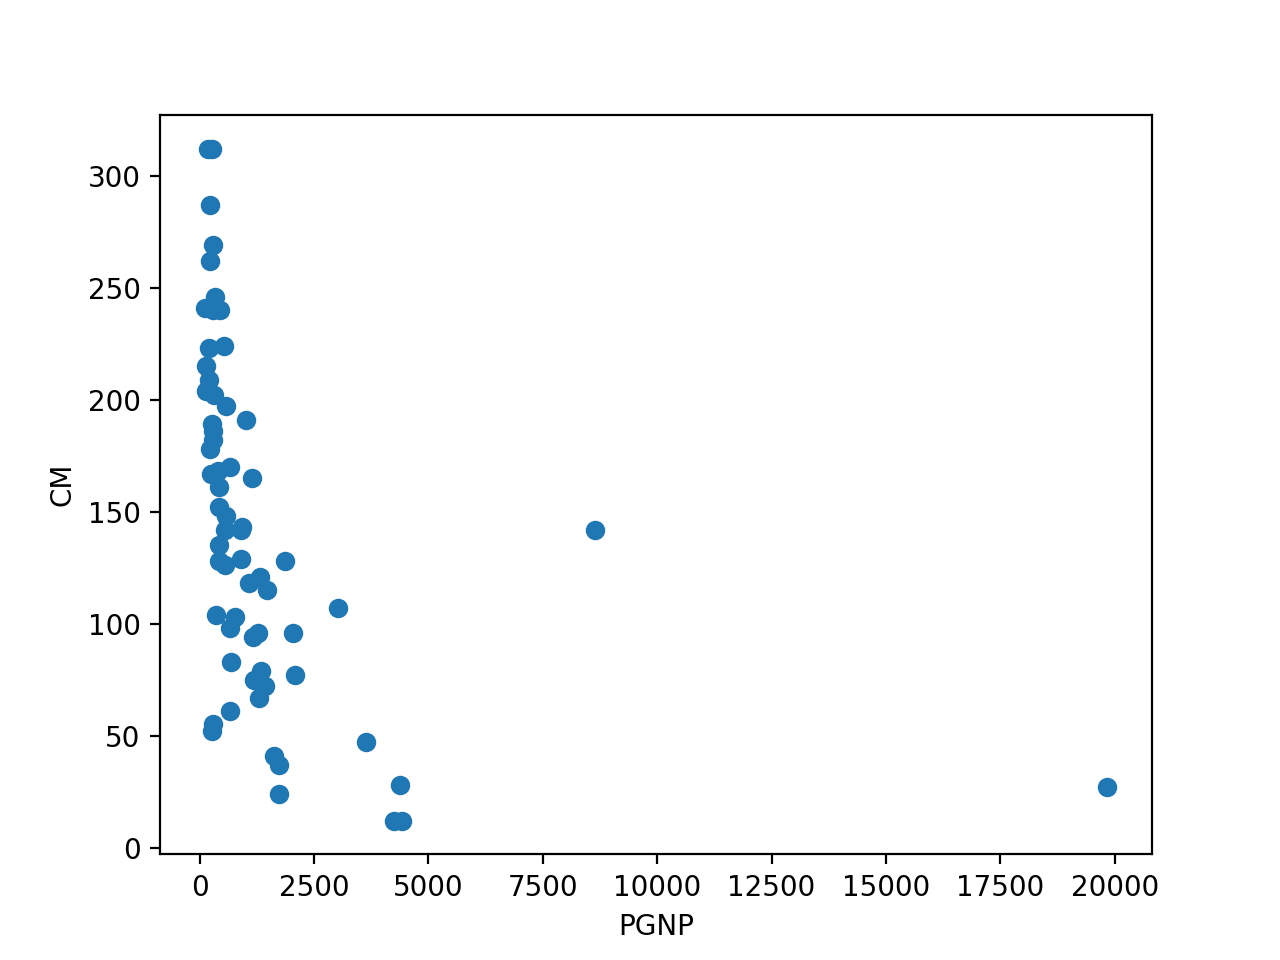

Text(0, 0.5, 'CM')

In [92]:
plt.figure()
plt.plot(datos.PGNP,datos.CM,'o')
plt.xlabel('PGNP')
plt.ylabel('CM')

In [93]:
reg1 = stm.ols('CM~PGNP',data = datos)
print(reg1.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                     CM   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     12.36
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           0.000826
Time:                        20:00:59   Log-Likelihood:                -361.64
No. Observations:                  64   AIC:                             727.3
Df Residuals:                      62   BIC:                             731.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    157.4244      9.846     15.989      0.0

In [94]:
datos['RepPGNP'] = 1/datos.PGNP

reg2 = stm.ols('CM~RepPGNP',data = datos)
print(reg2.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                     CM   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     52.61
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           7.82e-10
Time:                        20:01:00   Log-Likelihood:                -347.79
No. Observations:                  64   AIC:                             699.6
Df Residuals:                      62   BIC:                             703.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     81.7944     10.832      7.551      0.0

### Modelo log-lineal

In [95]:
uu = "https://raw.githubusercontent.com/vmoprojs/DataLectures/master/WO/ceosal2.csv"

datos = pd.read_csv(uu,header = None)
datos.columns = ["salary", "age", "college", "grad", "comten", "ceoten", "sales", "profits","mktval", "lsalary", "lsales", "lmktval", "comtensq", "ceotensq", "profmarg"]
datos.head()


reg1 = stm.ols('lsalary~ceoten',data = datos)
print(reg1.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                lsalary   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.334
Date:                Mon, 27 Mar 2023   Prob (F-statistic):              0.128
Time:                        20:01:19   Log-Likelihood:                -160.84
No. Observations:                 177   AIC:                             325.7
Df Residuals:                     175   BIC:                             332.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5055      0.068     95.682      0.0

### Regresión a través del origen

In [96]:
uu = "https://raw.githubusercontent.com/vmoprojs/DataLectures/master/GA/Table%206_1.csv"
datos = pd.read_csv(uu,sep = ';')
datos.head()


lmod1 = stm.ols('Y~ -1+X',data = datos)
print(lmod1.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.502
Model:                            OLS   Adj. R-squared (uncentered):              0.500
Method:                 Least Squares   F-statistic:                              241.2
Date:                Mon, 27 Mar 2023   Prob (F-statistic):                    4.41e-38
Time:                        20:02:00   Log-Likelihood:                         -751.30
No. Observations:                 240   AIC:                                      1505.
Df Residuals:                     239   BIC:                                      1508.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Regresión Lineal Múltiple

In [97]:
uu =  "https://raw.githubusercontent.com/vmoprojs/DataLectures/master/WO/hprice1.csv"
datos = pd.read_csv(uu,header=None)
datos.columns = ["price"   ,  "assess"  , 
                 "bdrms"  ,   "lotsize"  ,
                 "sqrft"   ,  "colonial",
                 "lprice"  ,  "lassess" ,
                 "llotsize" , "lsqrft"]

datos.describe()


,price,assess,bdrms,lotsize,sqrft,colonial,lprice,lassess,llotsize,lsqrft
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,293.546034,315.736364,3.568182,9019.863636,2013.693182,0.693182,5.633180,5.717994,8.905105,7.572610
std,102.713445,95.314437,0.841393,10174.150414,577.191583,0.463816,0.303573,0.262113,0.544060,0.258688
min,111.000000,198.700000,2.000000,1000.000000,1171.000000,0.000000,4.709530,5.291796,6.907755,7.065613
25%,230.000000,253.900000,3.000000,5732.750000,1660.500000,0.000000,5.438079,5.536940,8.653908,7.414873
50%,265.500000,290.200000,3.000000,6430.000000,1845.000000,1.000000,5.581613,5.670566,8.768719,7.520231
75%,326.250000,352.125000,4.000000,8583.250000,2227.000000,1.000000,5.787642,5.863982,9.057567,7.708266
max,725.000000,708.600000,7.000000,92681.000000,3880.000000,1.000000,6.586172,6.563291,11.436920,8.263591


In [98]:

modelo1 = stm.ols('lprice~lassess+llotsize+lsqrft+bdrms',data = datos)
print(modelo1.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     70.58
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           6.45e-26
Time:                        20:02:25   Log-Likelihood:                 45.750
No. Observations:                  88   AIC:                            -81.50
Df Residuals:                      83   BIC:                            -69.11
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2637      0.570      0.463      0.6

In [99]:
modelo2 = stm.ols('lprice~llotsize+lsqrft+bdrms',data = datos)
print(modelo2.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     50.42
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           9.74e-19
Time:                        20:02:25   Log-Likelihood:                 25.861
No. Observations:                  88   AIC:                            -43.72
Df Residuals:                      84   BIC:                            -33.81
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2970      0.651     -1.992      0.0

In [100]:
modelo3 = stm.ols('lprice~bdrms',data = datos)
print(modelo3.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     23.53
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           5.43e-06
Time:                        20:02:26   Log-Likelihood:                -8.8147
No. Observations:                  88   AIC:                             21.63
Df Residuals:                      86   BIC:                             26.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0365      0.126     39.862      0.0

<IPython.core.display.Javascript object>


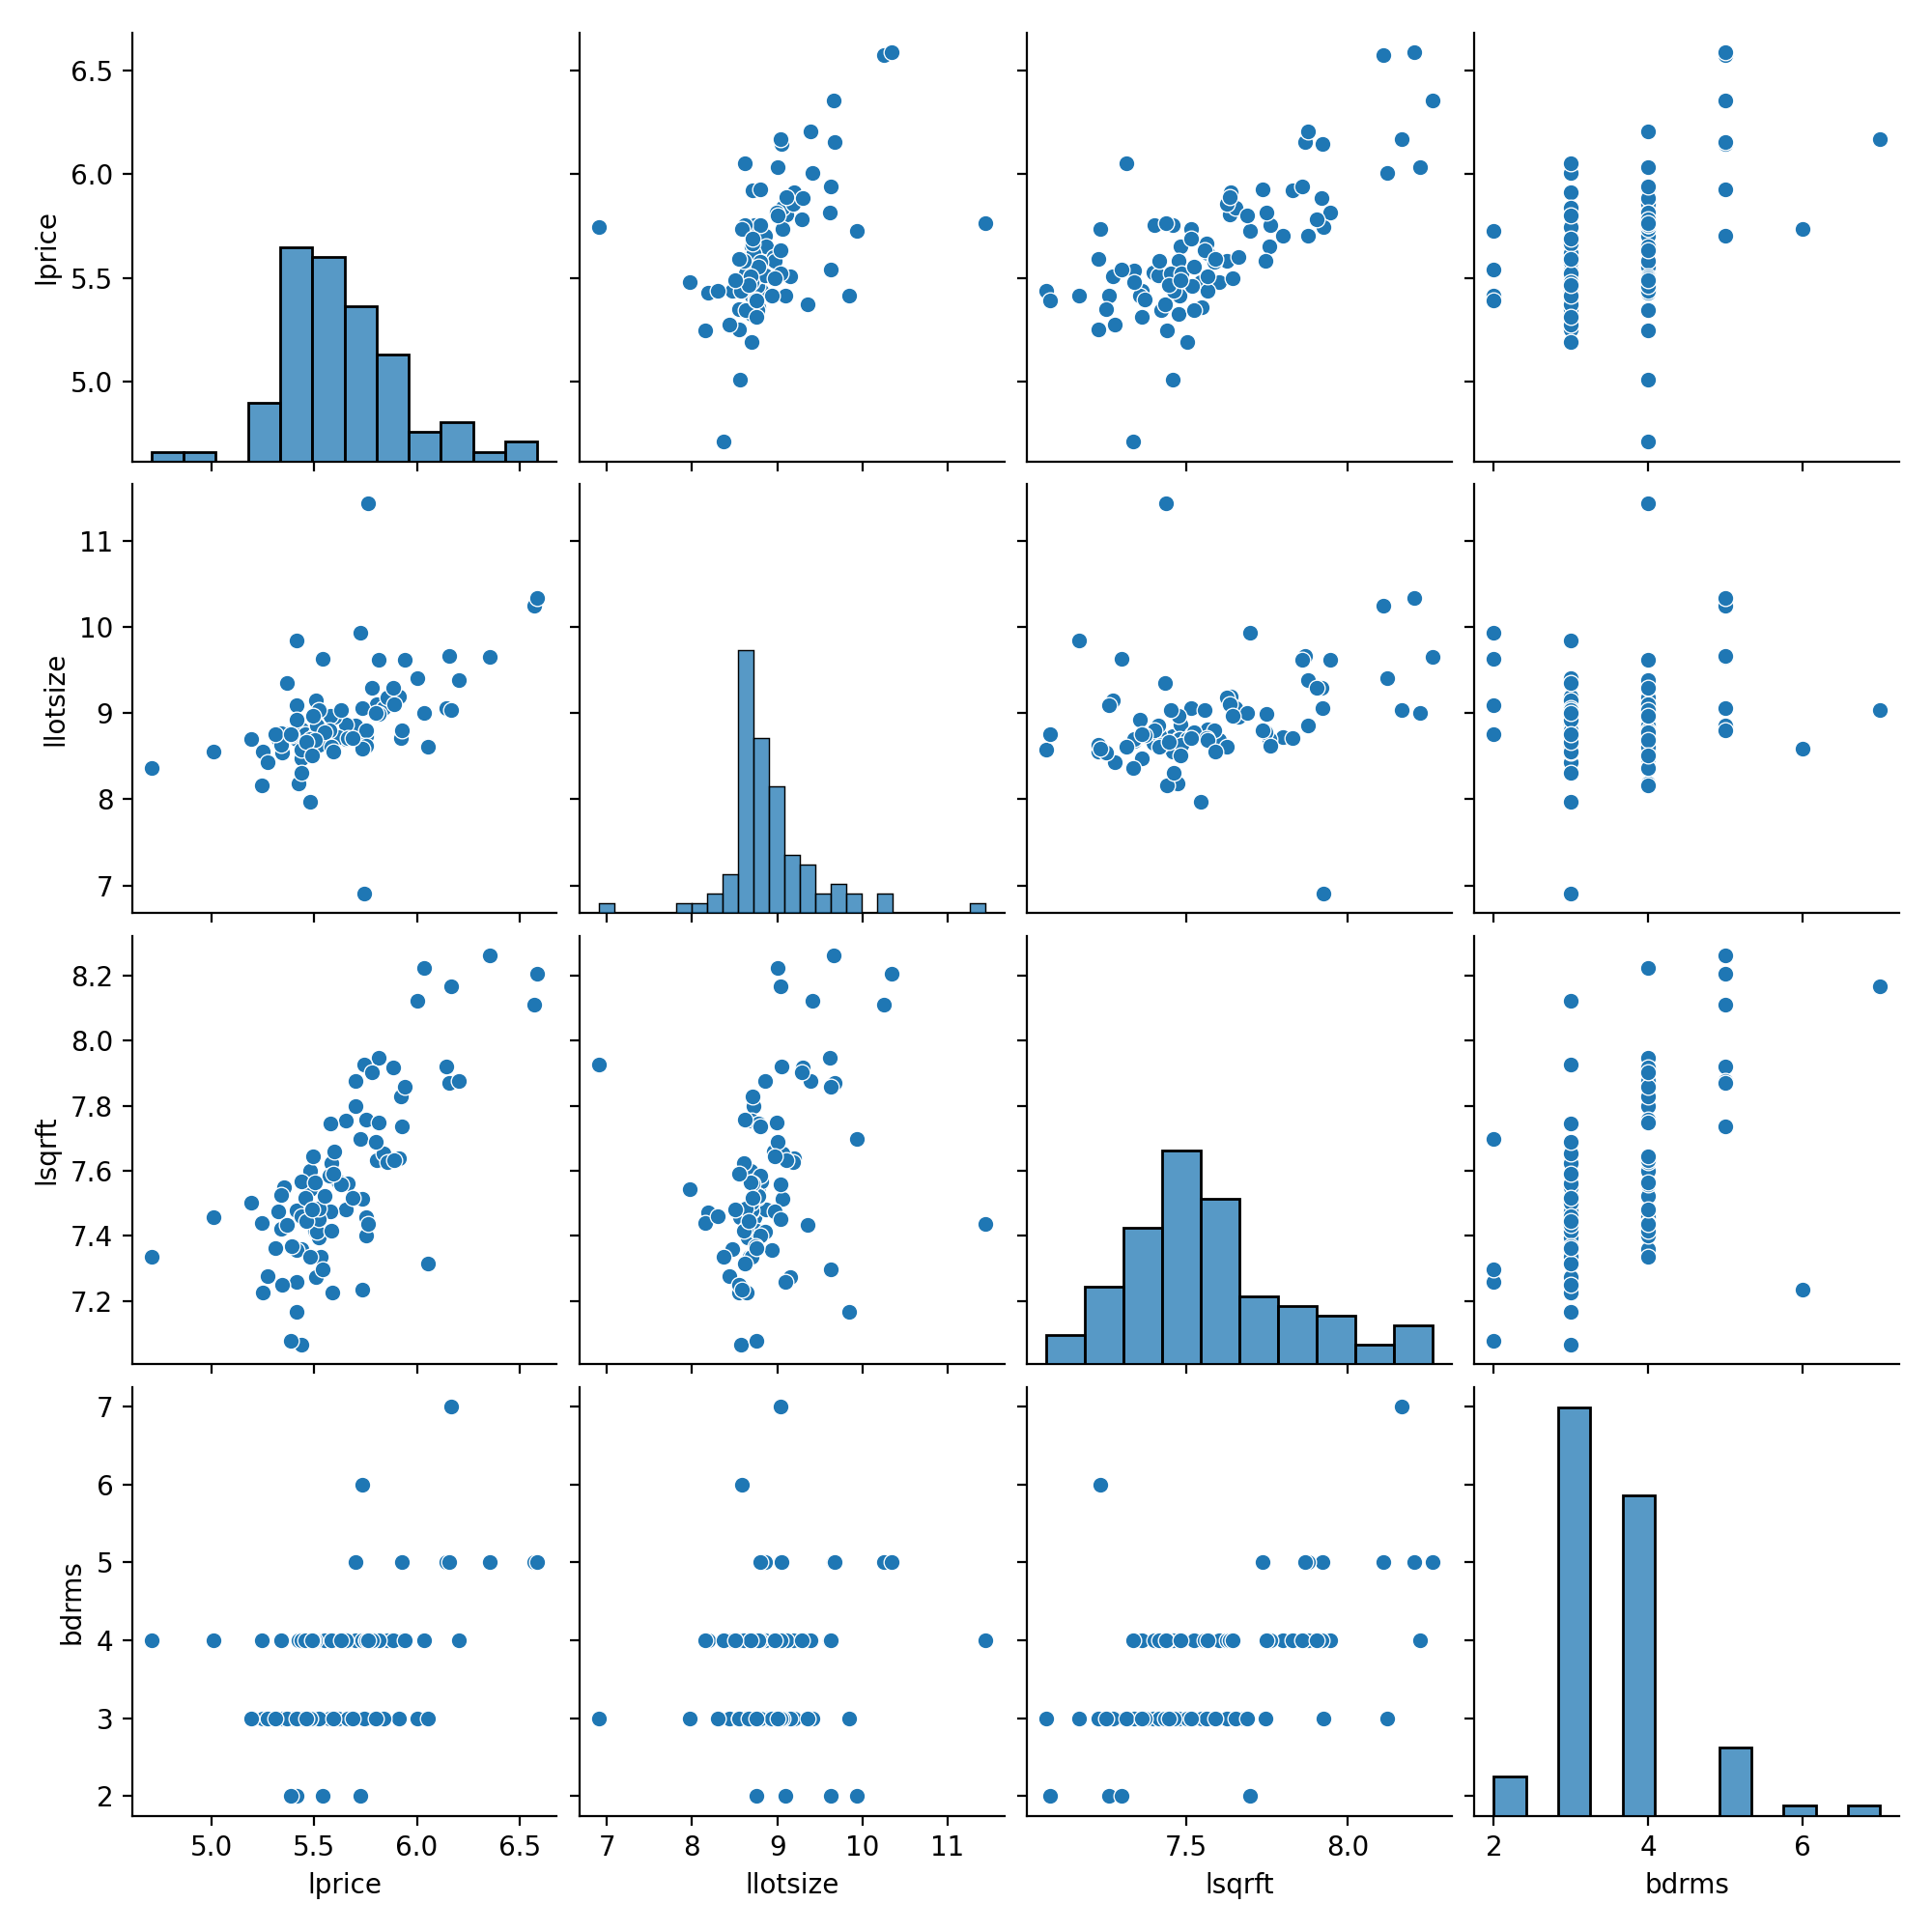

In [101]:
import seaborn as sns

sns.pairplot(datos.loc[:,['lprice','llotsize' , 'lsqrft' , 'bdrms']])

### Predicción

In [102]:
datos_nuevos = pd.DataFrame({'llotsize':np.log(2100),'lsqrft':np.log(8000),'bdrms':4},index = [0])

pred_vals = modelo2.fit().predict()
modelo2.fit().get_prediction().summary_frame().head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,5.776577,0.029185,5.718541,5.834614,5.404916,6.148239
1,5.707740,0.029306,5.649463,5.766018,5.336041,6.079440
2,5.310543,0.033384,5.244156,5.376930,4.937486,5.683600
3,5.326681,0.031818,5.263407,5.389955,4.954165,5.699197
4,5.797220,0.031014,5.735544,5.858895,5.424972,6.169467


In [103]:
pred_vals = modelo2.fit().get_prediction(datos_nuevos)
pred_vals.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,6.428811,0.147975,6.134546,6.723076,5.958326,6.899296


### RLM: Educación con insumos

In [104]:
uu = "https://raw.githubusercontent.com/vmoprojs/DataLectures/master/WO/gpa1.csv"
datosgpa = pd.read_csv(uu, header = None)
datosgpa.columns = ["age",  "soph",  "junior",    "senior",    "senior5",  "male", "campus",   "business", "engineer", "colGPA",   "hsGPA",    "ACT",  "job19",    "job20",    "drive",    "bike", "walk", "voluntr",  "PC",   "greek",    "car",  "siblings", "bgfriend", "clubs",    "skipped",  "alcohol",  "gradMI",   "fathcoll", "mothcoll"]

reg4 = stm.ols('colGPA ~ PC', data = datosgpa)
print(reg4.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 colGPA   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     7.314
Date:                Mon, 27 Mar 2023   Prob (F-statistic):            0.00770
Time:                        20:02:41   Log-Likelihood:                -56.641
No. Observations:                 141   AIC:                             117.3
Df Residuals:                     139   BIC:                             123.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9894      0.040     75.678      0.0

In [105]:
reg5 = stm.ols('colGPA ~ PC + hsGPA + ACT', data = datosgpa)
print(reg5.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 colGPA   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     12.83
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           1.93e-07
Time:                        20:02:42   Log-Likelihood:                -42.796
No. Observations:                 141   AIC:                             93.59
Df Residuals:                     137   BIC:                             105.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2635      0.333      3.793      0.0